### Importing libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Preparing the Data


In [2]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# -1: the value for this dimension is inferred 
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)
print(X_train.shape, X_test.shape)

# convert in float32 (more memory allocated)
X_train= X_train.astype('float32')
X_test = X_test.astype('float32')

# scale to 0-1, note the . after 255 (float)
X_train = X_train / 255.
X_test = X_test/ 255.

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [4]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

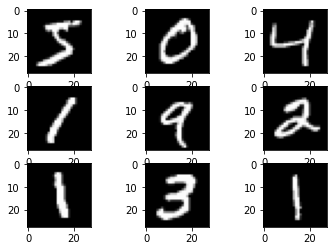

In [5]:
#ploting some image
for i in range(9) :
    plt.subplot(330 + 1 + i )
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))

# show the image
plt.show()

### Propose an architecture A of a neural network without convolution (the activation function of the output layer should be the softmax function).

In [6]:
# build  Model A 
model_A = Sequential()
model_A.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_A.add(tf.keras.layers.Dense(128 ,activation = tf.nn.relu))
model_A.add(tf.keras.layers.Dense(128 ,activation = tf.nn.relu))
model_A.add(tf.keras.layers.Dense(128 ,activation = tf.nn.relu))
model_A.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

# compile model A
model_A.compile(optimizer="adam", loss="categorical_crossentropy",
             metrics = ["accuracy"])

### Propose an architecture B of a convolutional neural network.

In [8]:
# build  Model B
model_B = Sequential()
#add model layers
model_B.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model_B.add(Conv2D(32, kernel_size=3, activation="relu"))
model_B.add(Flatten())
model_B.add(Dense(128, activation='linear'))
model_B.add(LeakyReLU(alpha=0.1))
model_B.add(Dense(10, activation="softmax"))

#compile model using accuracy to measure model performance
model_B.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Implement architectures A and B, illustrate them in text form and with a diagram (use the functions available in Keras).

#### Model A:

In [9]:
#Illustration in form of text
model_A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


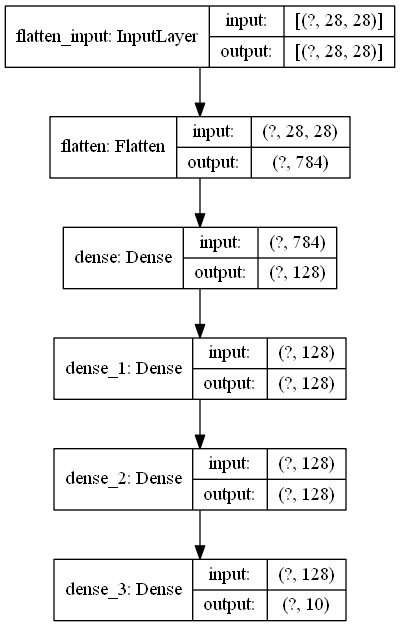

In [10]:
# Illustration in form of diagram
keras.utils.plot_model(model_A, "my_first_model_with_shape_info.png", show_shapes=True)

#### Model B :


In [11]:
#Illustration in form of text
model_B.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2359424   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,379,818
Trainable params: 2,379,818
Non-trainable params: 0
____________________________________________

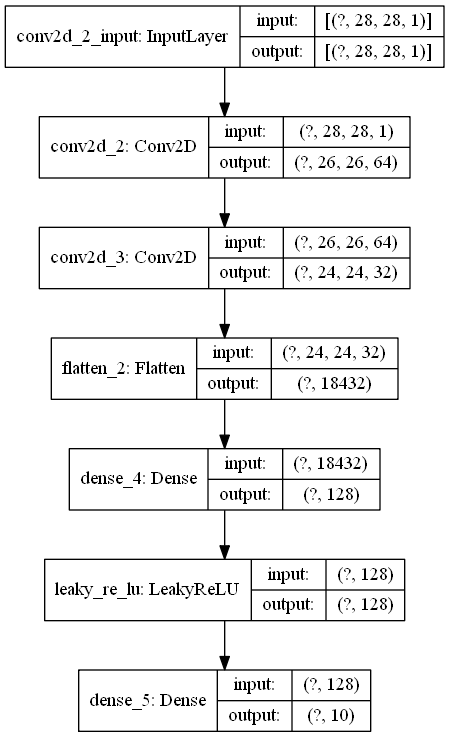

In [12]:
# Illustration in form of diagram
keras.utils.plot_model(model_B, "my_first_model_with_shape_info.png", show_shapes=True)

###  Train the neural network on the MNIST dataset (training set only).

In [13]:
batch_size = 32
epochs = 11

#### Model A:

In [14]:
#train  model A
train_A =model_A.fit(X_train, y_train, batch_size=batch_size,validation_split = 0.2,epochs=epochs)

Epoch 1/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2541 - accuracy: 0.9227 - val_loss: 0.1513 - val_accuracy: 0.9535
Epoch 2/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1102 - accuracy: 0.9657 - val_loss: 0.1189 - val_accuracy: 0.9632
Epoch 3/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0776 - accuracy: 0.9761 - val_loss: 0.1074 - val_accuracy: 0.9674
Epoch 4/11
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0616 - accuracy: 0.9806 - val_loss: 0.1131 - val_accuracy: 0.9673
Epoch 5/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0495 - accuracy: 0.9842 - val_loss: 0.0950 - val_accuracy: 0.9743
Epoch 6/11
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.1039 - val_accuracy: 0.9724
Epoch 7/11
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0976 - val_accuracy:

#### Model B :

In [15]:
#train the model
train_B = model_B.fit(X_train, y_train,batch_size=batch_size, validation_split = 0.2,epochs=epochs)

Epoch 1/11
1500/1500 [==============================] - 110s 74ms/step - loss: 0.1225 - accuracy: 0.9620 - val_loss: 0.0511 - val_accuracy: 0.9847
Epoch 2/11
1500/1500 [==============================] - 131s 87ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0667 - val_accuracy: 0.9802
Epoch 3/11
1500/1500 [==============================] - 117s 78ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0568 - val_accuracy: 0.9852
Epoch 4/11
1500/1500 [==============================] - 113s 76ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0534 - val_accuracy: 0.9858
Epoch 5/11
1500/1500 [==============================] - 118s 79ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0602 - val_accuracy: 0.9878
Epoch 6/11
1500/1500 [==============================] - 119s 80ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0655 - val_accuracy: 0.9865
Epoch 7/11
1500/1500 [==============================] - 118s 79ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0

### Visualize the evolution of the model’s accuracy (for both training and validation sets) during learning

#### Model A :

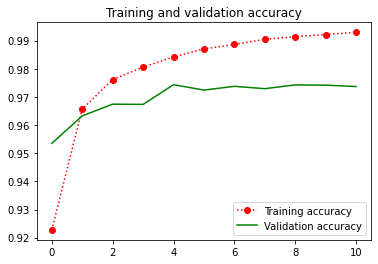

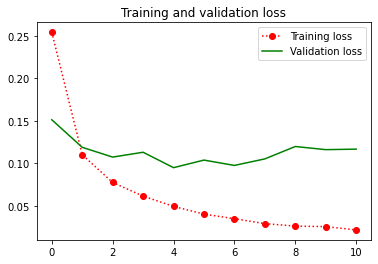

In [16]:
accuracy = train_A.history['accuracy']
val_accuracy = train_A.history['val_accuracy']
loss = train_A.history['loss']
val_loss = train_A.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo',linestyle="dotted", color="red", label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b',color="green", label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo',linestyle="dotted", color="red", label='Training loss')
plt.plot(epochs, val_loss, 'b',color="green", label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Model B

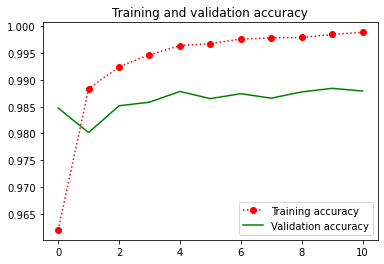

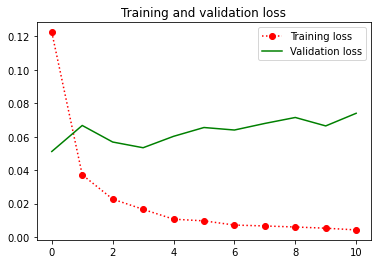

In [17]:
accuracy = train_B.history['accuracy']
val_accuracy = train_B.history['val_accuracy']
loss = train_B.history['loss']
val_loss = train_B.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo',linestyle="dotted", color="red", label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', color="green", label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo',linestyle="dotted", color="red", label='Training loss')
plt.plot(epochs, val_loss, 'b',color="green", label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Visualize the prediction of the neural network for a new input image (from the test set), i.e. on the
#### same figure:
#### – View the input image
#### – View network predictions (probabilities of class membership)

#### Model A:

In [18]:
prediction_A = model_A.predict([X_test])
prediction_A 

array([[9.78195602e-17, 1.12125662e-12, 2.36352982e-09, ...,
        1.00000000e+00, 1.63910400e-12, 2.70853580e-08],
       [1.00730503e-15, 2.63455995e-14, 1.00000000e+00, ...,
        2.39979889e-12, 2.20522012e-14, 4.43265126e-16],
       [1.45152956e-08, 9.99716222e-01, 2.72192437e-06, ...,
        2.37353888e-04, 2.65321378e-05, 4.81719953e-09],
       ...,
       [4.97928684e-13, 1.81487465e-14, 2.14730204e-14, ...,
        3.61674551e-10, 1.32658457e-12, 1.33802756e-08],
       [1.96684354e-22, 8.22311069e-23, 1.63355107e-24, ...,
        5.25704743e-21, 2.15765426e-12, 1.30355415e-23],
       [2.22587282e-09, 1.86013488e-12, 3.00559050e-10, ...,
        2.77062518e-16, 5.13610523e-08, 1.94251126e-09]], dtype=float32)

In [19]:
Text = "Model A prediction is" + str(np.argmax(prediction_A[0]))

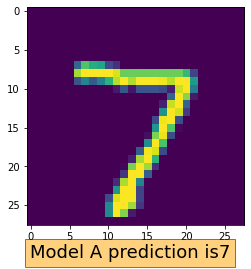

In [20]:
plt.imshow(X_test[0])
plt.figtext(0.5, 0.01, Text, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()
         

#### Model B:

In [21]:
prediction_B = model_B.predict([X_test])
prediction_B 

array([[1.71349314e-19, 8.75171316e-17, 3.07634028e-16, ...,
        1.00000000e+00, 5.18295862e-19, 7.10783030e-11],
       [1.03737981e-21, 2.74297090e-21, 1.00000000e+00, ...,
        7.76928791e-30, 2.68062832e-27, 4.44698669e-28],
       [9.26195210e-13, 9.99999762e-01, 1.26758604e-10, ...,
        8.52566195e-09, 1.60788446e-07, 8.34997904e-11],
       ...,
       [7.01815619e-32, 1.48288354e-17, 2.47905410e-26, ...,
        3.09819671e-17, 1.74185253e-18, 2.85992950e-14],
       [1.36189388e-22, 2.94879993e-22, 1.56344836e-26, ...,
        6.18884540e-18, 8.74163345e-14, 6.85112963e-19],
       [1.42909434e-14, 1.79432349e-17, 4.46494868e-15, ...,
        2.95727939e-24, 1.09768819e-19, 1.01663284e-20]], dtype=float32)

In [22]:
Text = "Model B prediction is " + str(np.argmax(prediction_B[123]))

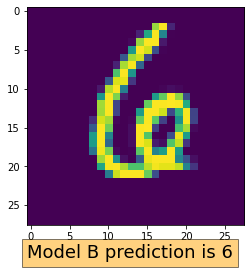

In [23]:
plt.imshow(X_test[123])
plt.figtext(0.5, 0.01, Text, ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

### Evaluate network performance on the MNIST test set

#### Model A:

In [24]:
test_eval_A = model_A.evaluate(X_test, y_test, verbose=0)
print('Test loss of model A:', test_eval_A[0])
print('Test accuracy of model A:', test_eval_A[1])

Test loss of model A: 0.1004108116030693
Test accuracy of model A: 0.9781000018119812


#### Model B:

In [25]:
test_eval_B = model_B.evaluate(X_test, y_test, verbose=0)
print('Test loss of model B:', test_eval_B[0])
print('Test accuracy of model B:', test_eval_B[1])

Test loss of model B: 0.05794940143823624
Test accuracy of model B: 0.9883000254631042
